<a href="https://colab.research.google.com/github/Sulthana-2000/Machine-Learning-Regression-Models/blob/main/Insurance_Claims_Charges_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims Charges Prediction

Download dataset

In [100]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-16 10:20:25--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-04-16 10:20:25 (4.92 MB/s) - ‘insurance.csv.2’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [101]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

In [102]:
#Read the Data
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [103]:
# info about the shape of data, type of individual columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


##STEP-2:Exploratory Data Analysis (EDA)

In [106]:
# Descriptive stats
# print no.of rows and columns
print("Shape of given dataset=",data.shape)

#calculate mean charges for male and female
m=np.mean(data[data['sex']=='male']['charges'])
print('Avg charges for male=',m)

f=np.mean(data[data['sex']=='female']['charges'])
print('Avg charges for female=',f)
print('\n')
print('Description of the dataset:\n')
data.describe()

Shape of given dataset= (1338, 7)
Avg charges for male= 13956.751177721893
Avg charges for female= 12569.578843835347


Description of the dataset:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
# Null check
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

<Figure size 600x400 with 0 Axes>

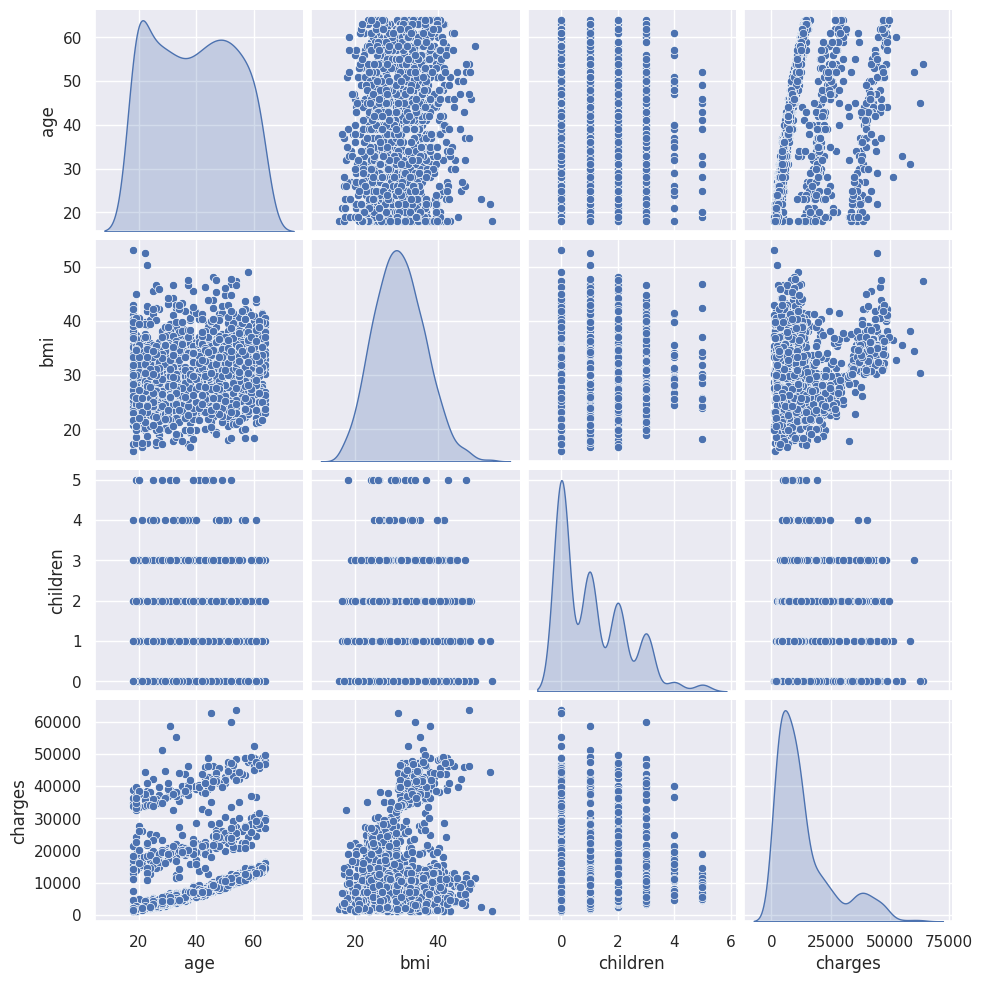

In [115]:
plt.figure(figsize=(6,4))
sns.pairplot(data=data,diag_kind='kde')

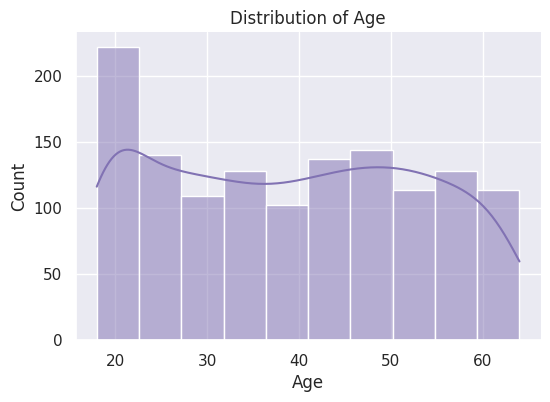

In [114]:
plt.figure(figsize=(6,4))
sns.set(style='darkgrid',palette='deep',color_codes=True)
sns.histplot(data['age'],bins=10,color='m',kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

sns.despine()
plt.show()

<ipython-input-117-9e5fd4925d45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=data,palette='Blues')


Text(0.5, 1.0, 'Age vs Charges')

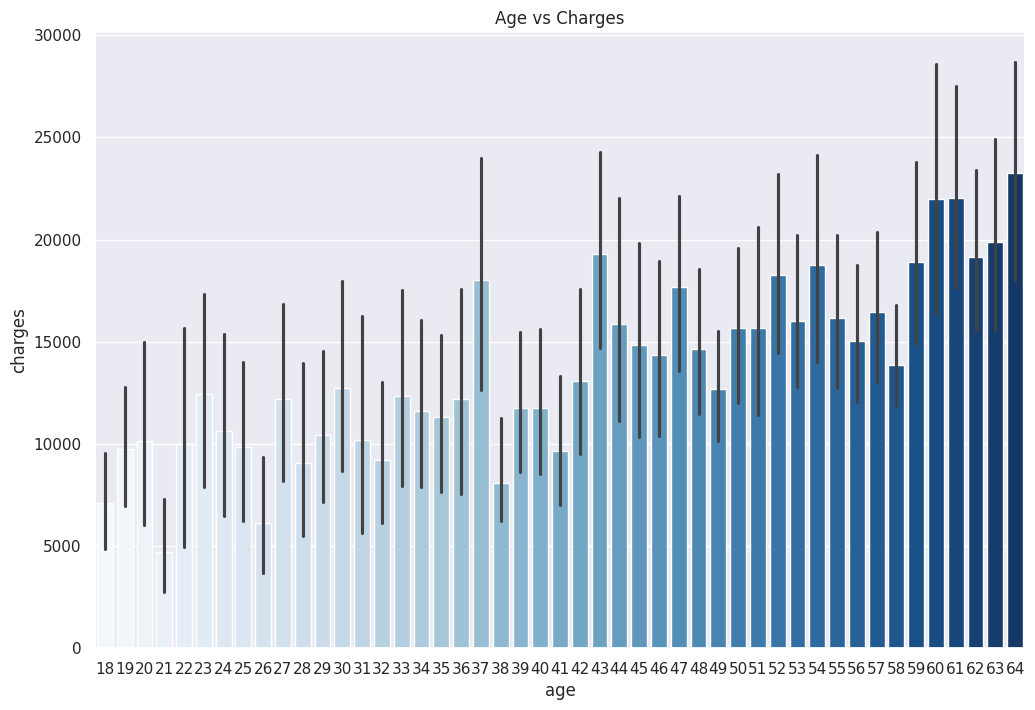

In [117]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize=(12,8))
sns.barplot(x='age',y='charges',data=data,palette='Blues')
plt.title('Age vs Charges')

Text(0.5, 1.0, 'No.of Males vs Females')

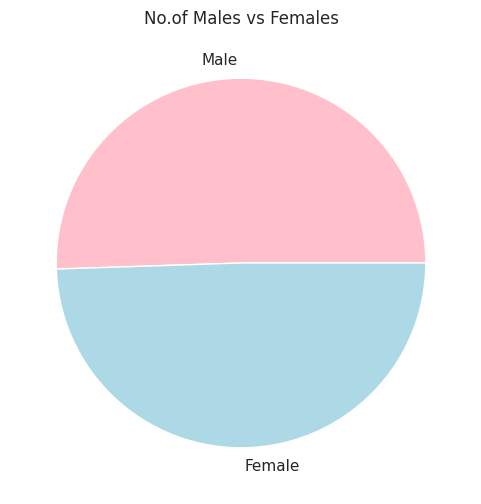

In [118]:
# sex vs charges
# males insurance charges more than females.

size=(data['sex'].value_counts())
colors=['pink','lightblue']
labels='Male','Female'
plt.figure(figsize=(6,6))
plt.pie(size,data=data,colors=colors,labels=labels)
plt.title('No.of Males vs Females')

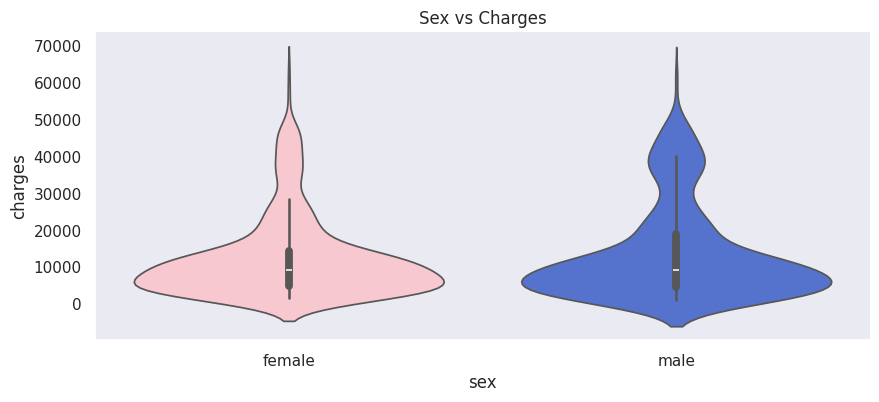

In [119]:
# sex vs charges
sns.set_style('dark')
colors=['pink','royalblue']
plt.figure(figsize=(10,4))
sns.violinplot(x='sex',hue='sex',y='charges',data=data,palette=colors,orient='v',legend=False)
plt.title('Sex vs Charges')
sns.despine()

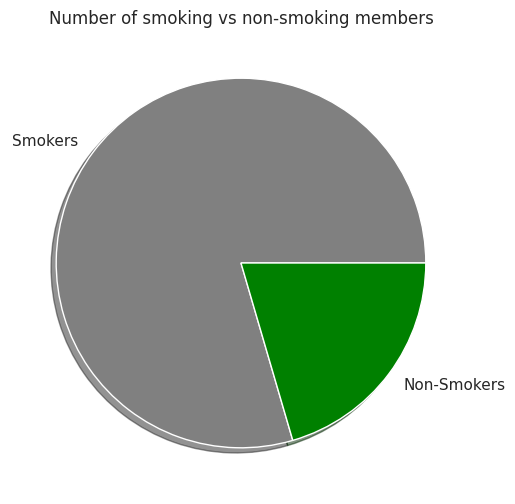

In [120]:
#smokers vs non-smokers
colors=['gray','green']
labels='Smokers','Non-Smokers'
size=(data['smoker'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(size,colors=colors,labels=labels,shadow=True)
plt.title('Number of smoking vs non-smoking members')
plt.show()

Text(0.5, 1.0, 'smoker vs charges')

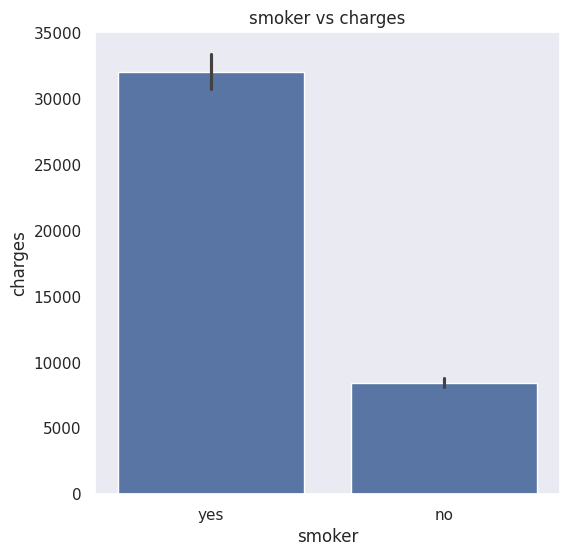

In [121]:
# smoker vs charges
# smokers have more insurance charges than the non smokers

plt.figure(figsize=(6,6))
sns.barplot(x='smoker',y='charges',data=data)

plt.title('smoker vs charges')

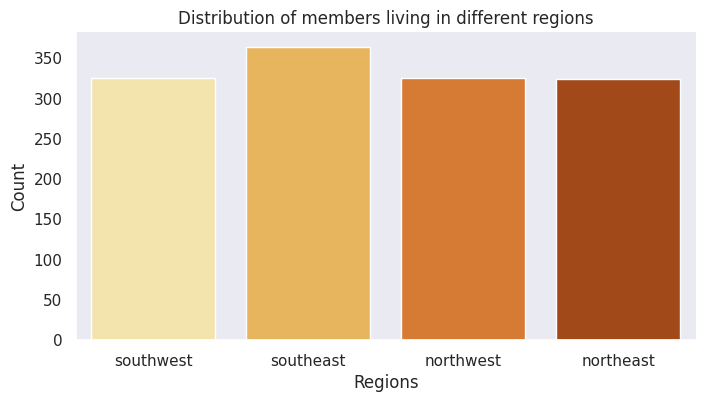

In [122]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='region',hue='region',palette='YlOrBr')
plt.title('Distribution of members living in different regions')
plt.xlabel('Regions')
plt.ylabel('Count')
sns.despine()

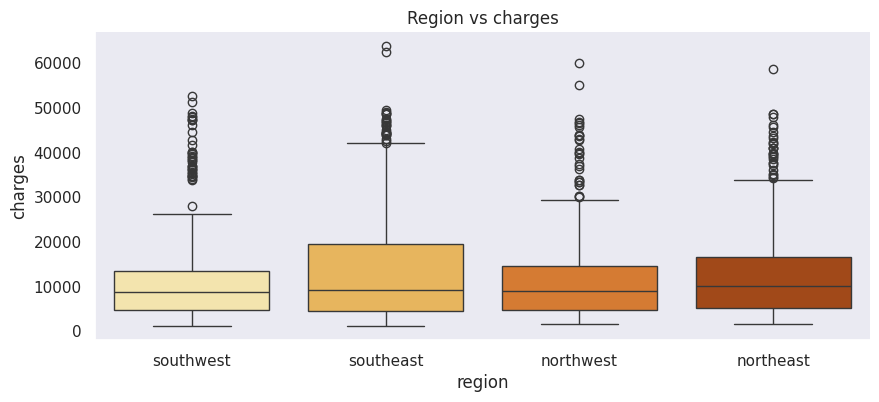

In [123]:
# region vs charges
# region actually does not play any role in determining the insurance charges

plt.figure(figsize=(10,4))
sns.boxplot(data=data,x='region',y='charges',hue='region',palette='YlOrBr')
plt.title('Region vs charges')
sns.despine()

##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
# converting categorical values into numerical ones
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

# Label Encoding for sex,smoker,region

data['sex_encoded']=label.fit_transform(data['sex'])
data['smoker_encoded']=label.fit_transform(data['smoker'])
data['region_encoded']=label.fit_transform(data['region'])

In [ ]:
# removing unnecassary columns from the dataset
data.drop(['region_encoded'],axis=1,inplace=True)

In [152]:
data

,age,bmi,children,charges,sex_encoded,smoker_encoded
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [158]:
#Selecting Independent (Features) & Dependent(Target) variables
x=data.drop(['charges'],axis=1)
y=data[['charges']]

In [159]:
x

,age,bmi,children,sex_encoded,smoker_encoded
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [160]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Splitting the dataset into the Training set and Test set

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [164]:
print(x_train.head())

     age     bmi  children  sex_encoded  smoker_encoded
332   61  31.160         0            0               0
355   46  27.600         0            1               0
138   54  31.900         3            0               0
381   55  30.685         0            1               1
292   25  45.540         2            1               1


In [165]:
print(x_test.head())

      age     bmi  children  sex_encoded  smoker_encoded
764    45  25.175         2            0               0
887    36  30.020         0            0               0
890    64  26.885         0            0               1
1293   46  25.745         3            1               0
259    19  31.920         0            1               1


In [166]:
print(y_train[:10])

          charges
332   13429.03540
355   24603.04837
138   27322.73386
381   42303.69215
292   42112.23560
1090  41676.08110
1075   4562.84210
141    3490.54910
676   12485.80090
626    6748.59120


In [167]:
print(y_test[:10])

          charges
764    9095.06825
887    5272.17580
890   29330.98315
1293   9301.89355
259   33750.29180
1312   4536.25900
899    2117.33885
752   14210.53595
1286   3732.62510
707   10264.44210


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [174]:
# creating the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# feeding the training data to the model
model.fit(x_train,y_train)

# predicting the test set results
y_pred=model.predict(x_test)

In [190]:
# Performance Evaluation

# calculating the mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

# Calculating the root mean squared error
data=mean_squared_error(y_test,y_pred)
print('Root mean Squared error:',np.sqrt(data))

# Calculating the r2 score
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test,y_pred)*100)

# calculation mean absolute error and mean absolute percentage error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))

Mean Squared Error: 34003912.39316076
Root mean Squared error: 5831.287370140556
R2 score: 76.8088164360072
Mean Absolute Error: 4171.01308409371
Mean Absolute Percentage Error: 0.44505428336717856


76.8% accuracy!

##Support Vector Machine

In [194]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
# creating the model
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=100,gamma='auto')

# feeding the training data to the model
svr.fit(x_train,y_train)

# predicting the test set results
y_pred=svr.predict(x_test)

In [199]:
#Performance Evaluation

# calculating the mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

# Calculating the root mean squared error
data=mean_squared_error(y_test,y_pred)
print('Root mean Squared error:',np.sqrt(data))

# Calculating the r2 score
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test,y_pred)*100)

# calculation mean absolute error and mean absolute percentage error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))


Mean Squared Error: 52609713.281488456
Root mean Squared error: 7253.255357526609
R2 score: 64.11937826879519
Mean Absolute Error: 3604.7341644172056
Mean Absolute Percentage Error: 0.1900568434344118


64.11% accuracy

##Decision Tree

In [203]:
# creating the model
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()

# feeding the training data to the model
dec.fit(x_train,y_train)

# predicting the test set results
y_pred=dec.predict(x_test)

In [204]:
#Performance Evaluation

# calculating the mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

# Calculating the root mean squared error
data=mean_squared_error(y_test,y_pred)
print('Root mean Squared error:',np.sqrt(data))

# Calculating the r2 score
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test,y_pred)*100)

# calculation mean absolute error and mean absolute percentage error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))

Mean Squared Error: 40045987.85915137
Root mean Squared error: 6328.189935451635
R2 score: 72.68802940364594
Mean Absolute Error: 3055.778739549751
Mean Absolute Percentage Error: 0.42970537008499815


72.68% accuracy

##Random Forest

In [ ]:
# creating the model
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=0)

# feeding the training data to the model
reg.fit(x_train,y_train)

# predicting the test set results
y_pred=reg.predict(x_test)

In [210]:
#Performance Evaluation

# calculating the mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

# Calculating the root mean squared error
data=mean_squared_error(y_test,y_pred)
print('Root mean Squared error:',np.sqrt(data))

# Calculating the r2 score
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test,y_pred)*100)

# calculation mean absolute error and mean absolute percentage error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))

Mean Squared Error: 22933226.956556123
Root mean Squared error: 4788.864892284613
R2 score: 84.35919167433298
Mean Absolute Error: 2652.8603178631847
Mean Absolute Percentage Error: 0.3442684317144513


84.35% accuracy

Compare and evaluate the Model results and find the best model

`````
Model Scores:

          1.Linear Regression      :76.8%
          2.Support vector machine :64.11%
          3.Decision Tree          :72.68%
          4.Random Forest          :84.35%

`````


From the above results we can conclude that the best model is Random Forest model with 84.35% accuracy.